In [1]:
import pandas as pd


data = pd.read_csv('reliance_20years.csv', skiprows=2)


data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
for col in ['Open', 'Close', 'High', 'Low']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')


today = pd.Timestamp('2025-06-18')
data = data[data['Date'] <= today]


data = data.drop_duplicates(subset=['Date'])
data = data.sort_values('Date').reset_index(drop=True)

data = data.dropna(subset=['Date', 'Open', 'Close'])


In [2]:
print(data.head())
print(data.tail())
print(data.describe())
print(data['Date'].min(), data['Date'].max())


        Date      Close       High        Low       Open     Volume
0 2005-01-03  37.420300  37.499429  36.728795  37.114112   96188867
1 2005-01-04  36.553333  37.843450  36.439802  37.843450   73639782
2 2005-01-05  36.463890  36.704714  35.514366  36.192108  112450407
3 2005-01-06  36.205864  36.914567  35.934075  36.329713   91978134
4 2005-01-07  37.310204  37.685199  36.298753  36.811360  108134977
           Date        Close         High          Low         Open    Volume
5043 2025-06-11  1448.900024  1468.599976  1443.099976  1445.800049   8195700
5044 2025-06-12  1441.599976  1457.000000  1434.400024  1453.500000   8828114
5045 2025-06-13  1427.900024  1435.500000  1414.300049  1424.000000   9757276
5046 2025-06-16  1437.800049  1442.400024  1424.400024  1426.900024   8458093
5047 2025-06-17  1431.199951  1448.000000  1425.800049  1448.000000  10366599
                                Date        Close         High          Low  \
count                           5048  5048.00

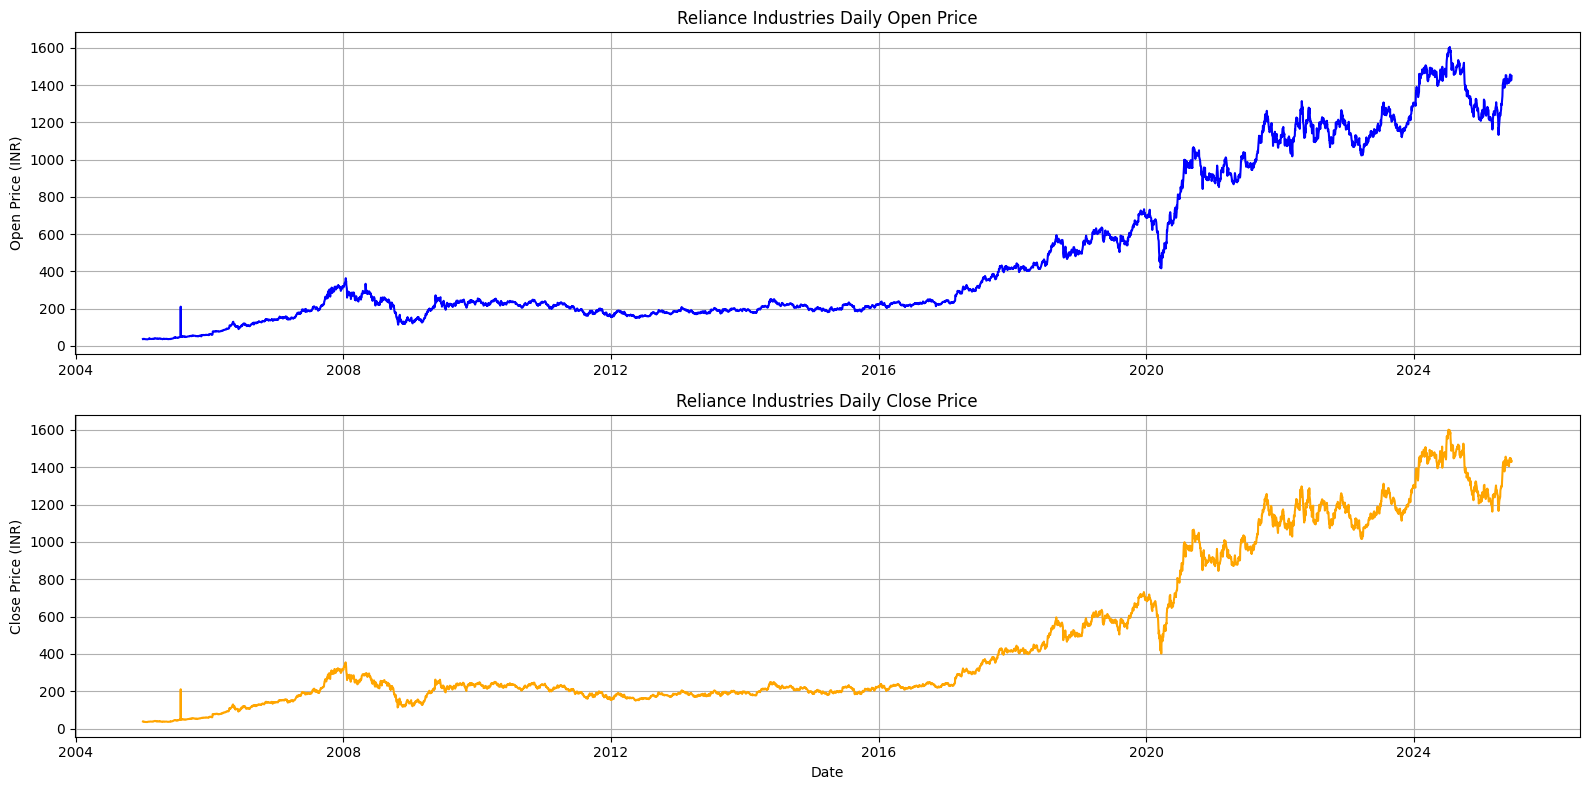

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Open'], color='blue')
plt.title('Reliance Industries Daily Open Price')
plt.ylabel('Open Price (INR)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Close'], color='orange')
plt.title('Reliance Industries Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.grid()

plt.tight_layout()
plt.show()


In [5]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5years.shape


(1595, 6)

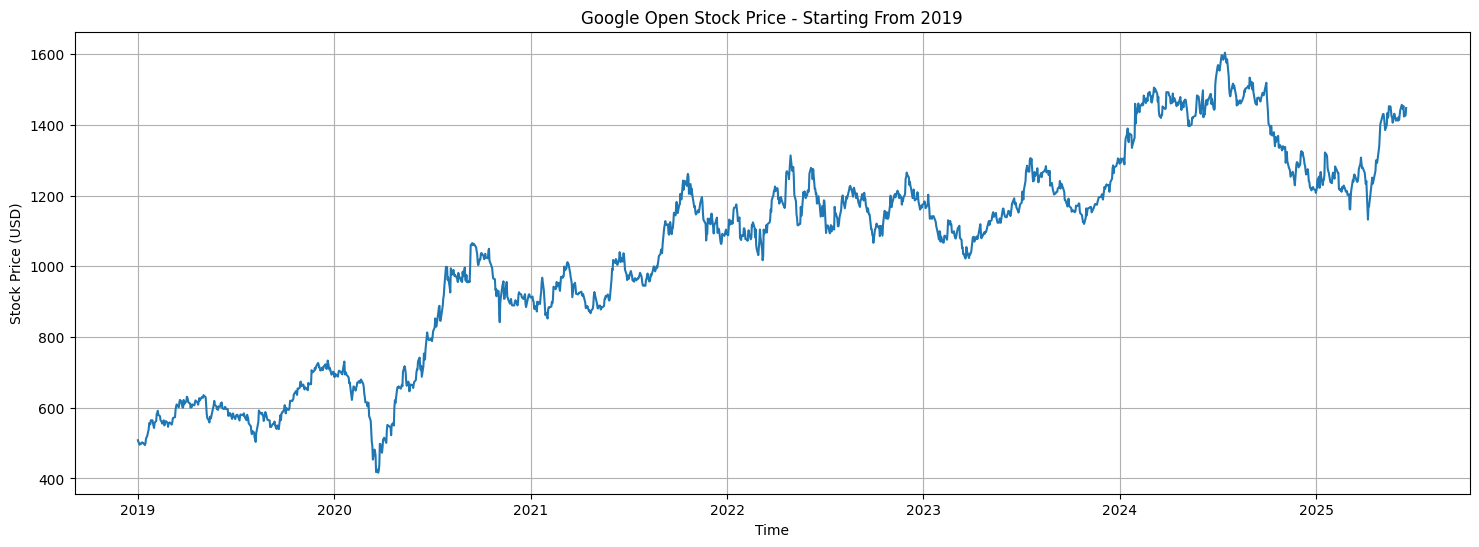

In [6]:
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()